# CMSC320 Final Project: Child Malnutrition
### _AGR Capital: Gautom Das, Amol Menon, Rishabh Misra_

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import pycountry
import pycountry_convert as pc
from matplotlib import pyplot as plt
import geopandas as gpd
from tabulate import tabulate
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Data Collection + Parsing

In [2]:
df = pd.read_csv('archive/Childhood malnutrition.csv')
df.head()

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)"
0,Afghanistan,AFG,1997,53.2,44.9,18.2
1,Afghanistan,AFG,2004,59.3,32.9,8.6
2,Afghanistan,AFG,2013,40.4,24.6,9.5
3,Afghanistan,AFG,2018,38.2,19.1,5.1
4,Albania,ALB,1997,20.4,7.1,8.1


In [3]:
df.size

5502

## Data Management/Representation

In [4]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

def get_continent(x):
    try:
        # Get from alpha_3
        return continents[pc.country_alpha2_to_continent_code(pycountry.countries.get(alpha_3=x).alpha_2)]
    except:
        return np.nan

In [5]:
df['Continent'] = df['Code'].apply(get_continent)
df[df['Continent'].isna()]

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)",Continent
780,Timor,TLS,2002,55.7,40.6,13.7,NaN
781,Timor,TLS,2003,54.8,41.5,14.3,NaN
782,Timor,TLS,2007,57.2,49.5,21.3,NaN
783,Timor,TLS,2009,57.5,44.9,18.9,NaN
784,Timor,TLS,2013,51.7,37.5,9.9,NaN


In [6]:
# Manually Adding a Continent for Timor
df['Continent'] = df['Continent'].replace(np.nan, 'Asia')
df[df['Continent'].isna()].size

0

In [7]:
df.rename(columns={"Prevalence of stunting, height for age (% of children under 5)": "Stunting",
                   "Prevalence of underweight, weight for age (% of children under 5)" : "Underweight",
                   "Prevalence of wasting, weight for height (% of children under 5)" : "Wasting"},
          inplace=True)
df.head()

,Entity,Code,Year,Stunting,Underweight,Wasting,Continent
0,Afghanistan,AFG,1997,53.2,44.9,18.2,Asia
1,Afghanistan,AFG,2004,59.3,32.9,8.6,Asia
2,Afghanistan,AFG,2013,40.4,24.6,9.5,Asia
3,Afghanistan,AFG,2018,38.2,19.1,5.1,Asia
4,Albania,ALB,1997,20.4,7.1,8.1,Europe


## Exploratory Data Analysis
After we had collected our data, and represented in a way that we were ready to work with, including adding our continent label using our special library, we were ready to begin with some exploratory data analysis. 

Our EDA took place in two steps: 
1. Scatterplots to view the trend of each of our three characteristics (stunting, underweight, and wasting) over time
2. Geographically mapping the prevalence of each of the three characteristics to see visually how they differ between different countries and continents

### Scatterplots
The reason we wanted to use scatterplots was to observe trends in our data over time. We have a series of data points across time from 1983 to 2020. As a society, we consistently talk about how we hope to address social issues like malnutrition across time, and so as data scientists, we wanted to visually see a downward sloping scatterplot for stunting, underweight, and wasting over time. 

The way we went about plotting was to use `matplotlib.pyplot.scatter` to create a scatterplot of each of our >5000 datapoints with year on the x-axis and percentage of each trait on the y-axis. Then, a line of best fit was added onto the scatterplot (using `scipy.stats.linregress`) to aid in visual interpretation of the plot. A statistical significance test of each line was conducted later on, in our `Hypothesis Testing` section. 

`plt.subplots` was used to generate all the scatterplots in one output. The scatterplots (blue dots) and line (red) both were quite straightforward to generate using the aforementioned libraries. Code for this is presented below. 

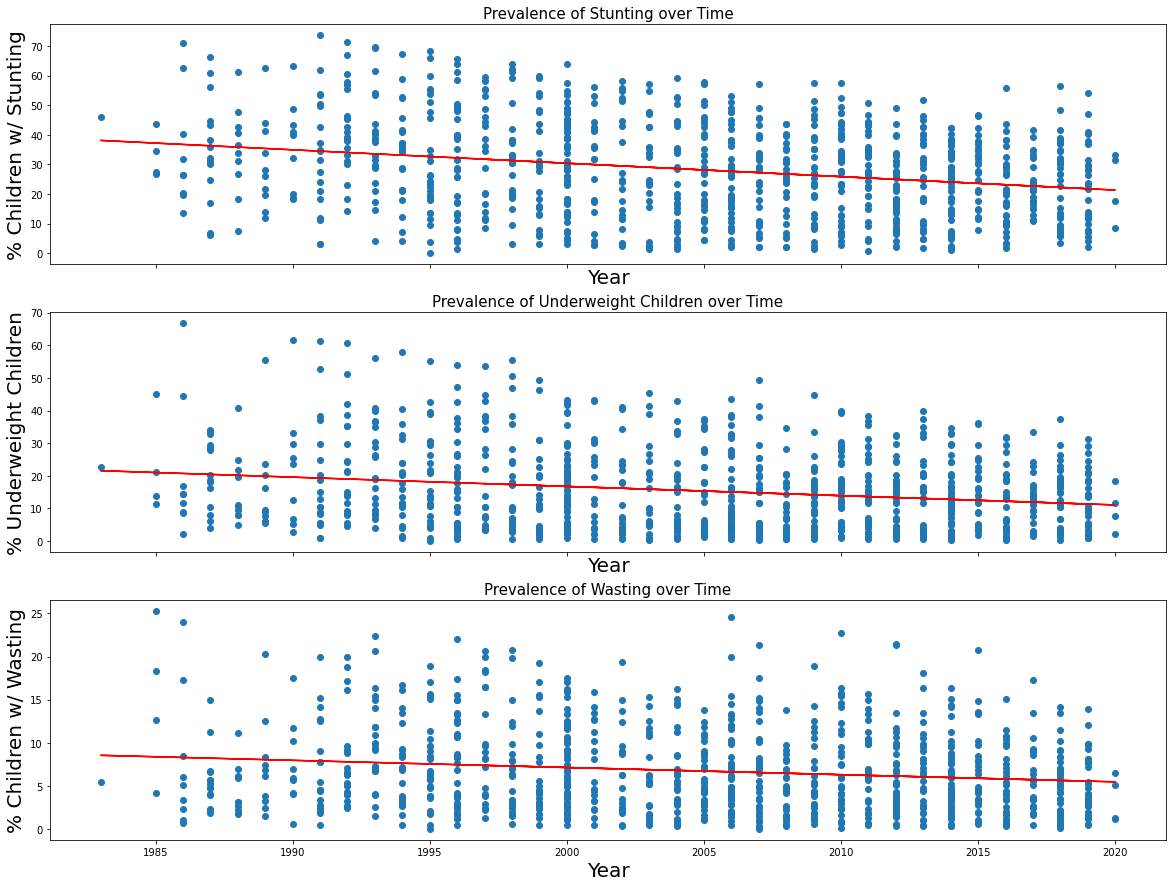

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=True)


axs[0].scatter(df['Year'], df['Stunting'])
axs[0].set_title('Prevalence of Stunting over Time', fontsize=15)
axs[0].set_xlabel("Year", fontsize=20)
axs[0].set_ylabel("% Children w/ Stunting", fontsize=20)
res = stats.linregress(df['Year'], df['Stunting']) 
axs[0].plot(df['Year'], res.intercept + res.slope*df['Year'], 'r')


axs[1].scatter(df['Year'], df['Underweight'])
axs[1].set_title('Prevalence of Underweight Children over Time', fontsize=15)
axs[1].set_xlabel("Year", fontsize=20)
axs[1].set_ylabel("% Underweight Children" , fontsize=20)
res = stats.linregress(df['Year'], df['Underweight']) 
axs[1].plot(df['Year'], res.intercept + res.slope*df['Year'], 'r')

axs[2].scatter(df['Year'], df['Wasting'])
axs[2].set_title('Prevalence of Wasting over Time', fontsize=15)
axs[2].set_xlabel("Year", fontsize=20)
axs[2].set_ylabel("% Children w/ Wasting", fontsize=20)
res = stats.linregress(df['Year'], df['Wasting']) 
axs[2].plot(df['Year'], res.intercept + res.slope*df['Year'], 'r')

plt.show()

Overall, we see that there is a general decrease in attributes that make up malnutrition (stunting, underweight, wasting) over time. However, the slope of each line is not that steep, so we see that it is still a big problem in the world today, and one we must continue to address. The line for underweight children appears to be slightly less steep than the other two slopes, indicating that perhaps this attribute has not been as properly addressed by our society compared to the other two traits.

Another interesting observation is that we see we tend to have more data per year in more recent time periods. This makes sense, because as our data gathering capabilities have increased, we would be able to go to more countries to gather data on childhoold malnutrition.

For each given year, in all three of our categories, there does seem to be a good bit of variability, giving evidence that in different countries, wasting, being underweight, and stunting varies, which is something that we looked at in the second part of our exploratory data analysis: the geographic maps.

### Geographic Maps
After looking at our values over time, we were ready to observe how childhood malnutrition is different around the globe in a visual manner. So, we decided to map the average values of stunting, underweight, and wasting children around the world. To do this, we first needed to calculate the mean of each of the three values for each country, which we did using the `pd.groupby.mean()` function. We also dropped the year column in our average dataset, since it was no longer important. 

In [9]:
average_df = df.drop(columns=['Year'])
average_df = average_df.groupby('Code').mean()
average_df.head()

,Stunting,Underweight,Wasting
Code,,,
AFG,47.775000,30.375,10.350000
AGO,42.633333,23.600,6.933333
ALB,24.160000,7.700,7.760000
ARG,10.025000,2.600,2.150000
ARM,16.120000,3.480,3.940000


To make the maps, we used `geopandas`, a library for doing just that: making maps. We first needed to read in data that contained  polygon shapes we could plot for each country, all of which would make a world map. 

In [10]:
# Get the country geomtery data
geo_df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

geo_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


After we had this data, we wanted to test out a basic plot just to see if everything had gone well with setting up `geopandas`. So, we made a quick sample map to observe if setup went right. Note that we removed Antarctica from our maps, because it takes up a lot of space in our map, and we don't have much use for it anyways, since none of our data is from Antarctica.

<AxesSubplot:>

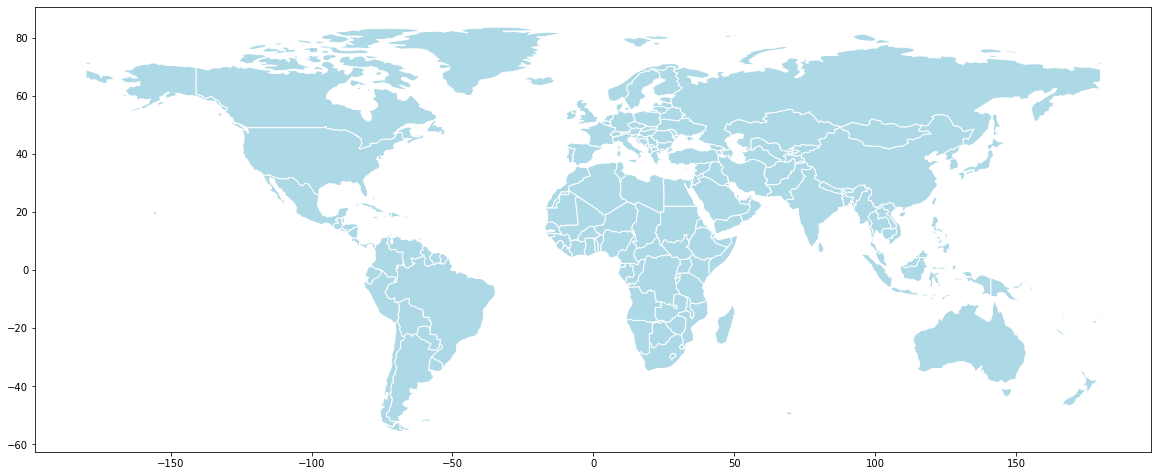

In [11]:
# Drop row for 'Antarctica'. It takes a lot of space in the map and is not of much use
geo_df = geo_df.drop(geo_df.loc[geo_df['name'] == 'Antarctica'].index)

# Print the map
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

Nice! Our map works. Now, all that was left before outputting our maps was to merge our two tables (`average_df` and `geo_df` which contained our polygons) so we could have our data in one table, where for each country we had average values for our three categories, as well as a polygon shape that could be used by `geopandas` to plot. We used the `pd.merge()` function for this, joining on the country code, and dropped any countries in the table we didn't have data for in our dataset.

In [12]:
merged_df = pd.merge(left=geo_df, right=average_df, how='left', left_on='iso_a3', right_on='Code')
merged_df = merged_df.dropna()
merged_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Stunting,Underweight,Wasting
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",5.900000,6.100000,8.050000
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",40.990909,17.727273,5.054545
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2.909091,0.854545,0.427273
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",15.020000,3.760000,4.200000
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",23.700000,7.000000,6.475000


Now that the table was ready, we were ready to plot. First, we plotted the percent of children with stunted growth in countries around the world. We used a lot of the `geopandas` documentation (https://geopandas.org/en/stable/docs/user_guide.html) to help us create this map and the two subsequent ones as well. Code for mapping stunted growth around the world is presented below.

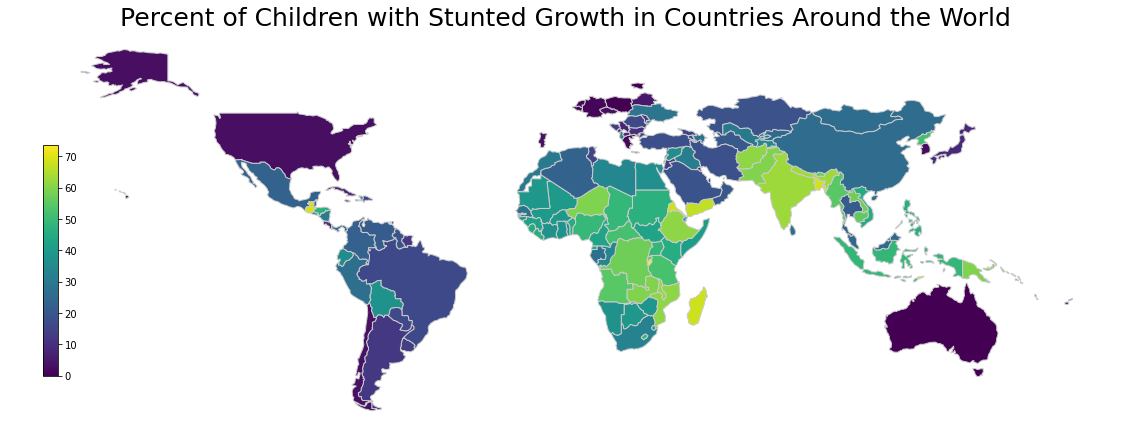

In [13]:
title = 'Percent of Children with Stunted Growth in Countries Around the World'
col = 'Stunting'
vmin = df[col].min()
vmax = df[col].max()
cmap = 'viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))


# Remove the axis
ax.axis('off')
merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

The countries that are white'd out (like Canada) are those we don't have data for. Looking at the map, we see interesting phenomenons. We see that stunted growth is most prevalent in Africa and South Asia (India area). Additionally, central America and the north countries of South America also have a good amount of stunted growth. Europe, the United States, and Australia appear to have the lowest rate of stunted children around the world. This provides evidence that African, south Asian, and central American countries are where child malnourishment is most prevalent. 

After plotting on stunted growth, we were ready to plot on the percent of children underweight around the world. The plotting process was quite similar for this map. 

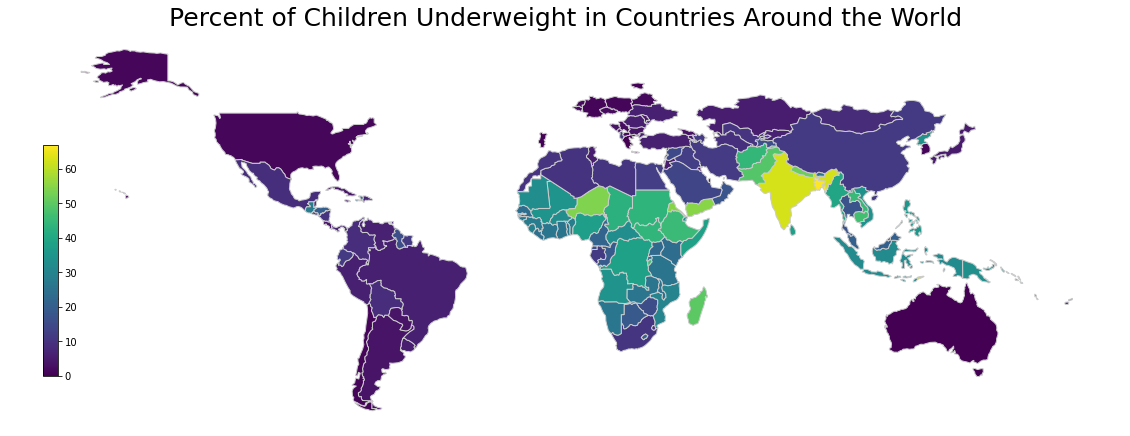

In [14]:
title = 'Percent of Children Underweight in Countries Around the World'
col = 'Underweight'
vmin = df[col].min()
vmax = df[col].max()
cmap = 'viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))


# Remove the axis
ax.axis('off')
merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

Looking at this map, the South Asia area, particularly India and Bangladesh stand out as having the largest percent of children underweight around the world. Behind this is the southeast Asia area, African countries (particularly middle Africa), and a few central American countries. In this map, South American countries aren't particularly highlighted as having underweight children like the previous map highlighted for stunting, and India and Africa still stand out as having more malnourished children. Perhaps this points to the idea that malnourishment in India/Africa is caused by multiple factors, whereas in South America, not as many children are underweight, but they are malnourished due to stunted growth. 

Let's see what kind of insight the Wasting map can give us. Again, the procedure for this map was quite straightforward.

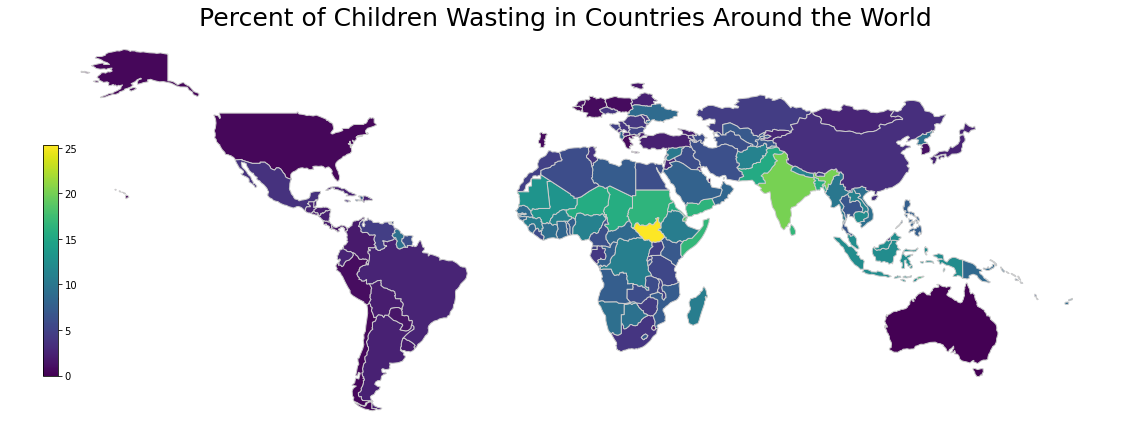

In [15]:
title = 'Percent of Children Wasting in Countries Around the World'
col = 'Wasting'
vmin = df[col].min()
vmax = df[col].max()
cmap = 'viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))


# Remove the axis
ax.axis('off')
merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

In this map, South Sudan brightly stands out as having the highest percent of children with wasting in the entire world. Behind this is again south Asia (the India area) and other middle African countries. It appears as though south Sudan specifically is affected by wasting more than other world countries, but other areas around the world still experience moderate amounts of it. 

From this graphical analysis of maps, it appears as though malnourishment is a very large problem in children in India and Africa specifically, as they had high percentages for all three factors on average. Additionally, the central America/northern South America area additionally is prevalent with child malnourishment, as they had high values of stunted children. 

After doing our EDA and coming up with these initial conclusions about how child malnourishment differs in countries and continents around the world, we were ready to move on with hypothesis testing to try and get some more concrete evidence of this claim. 

## Hypothesis Testing
### Linear Regression by Continent

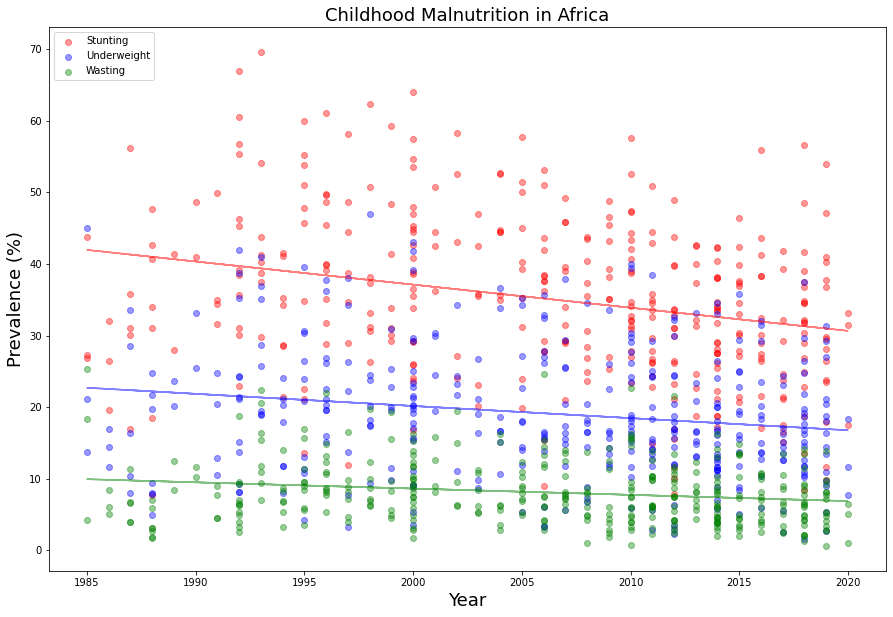

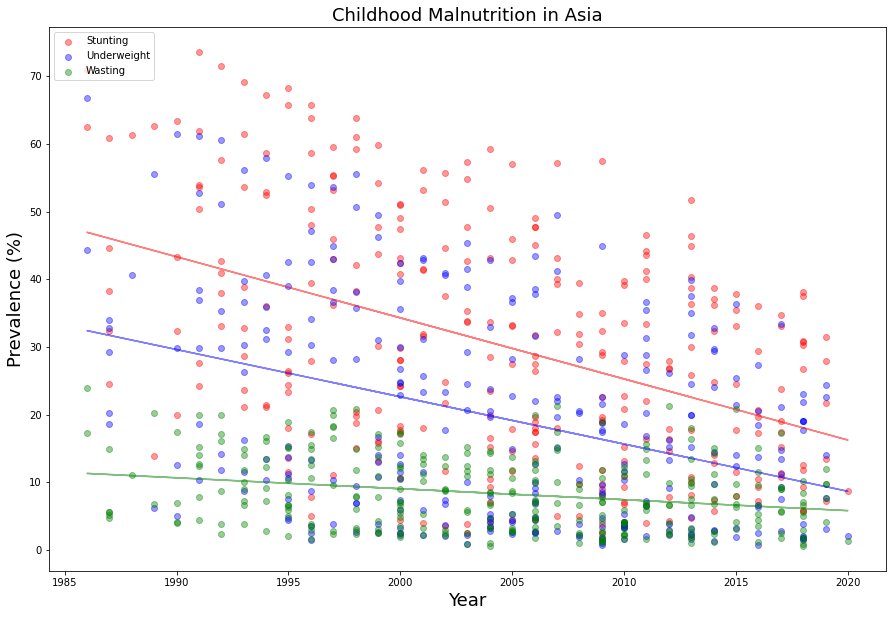

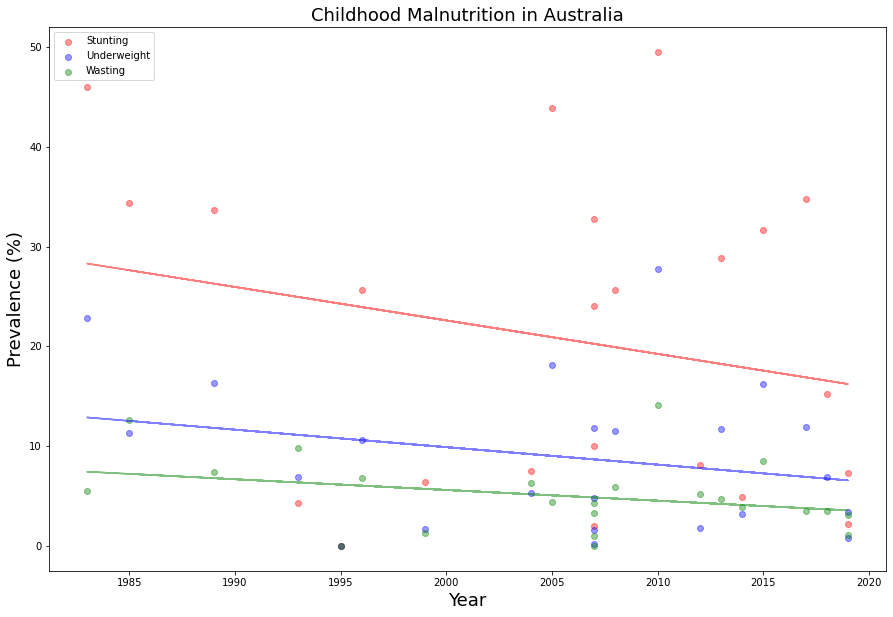

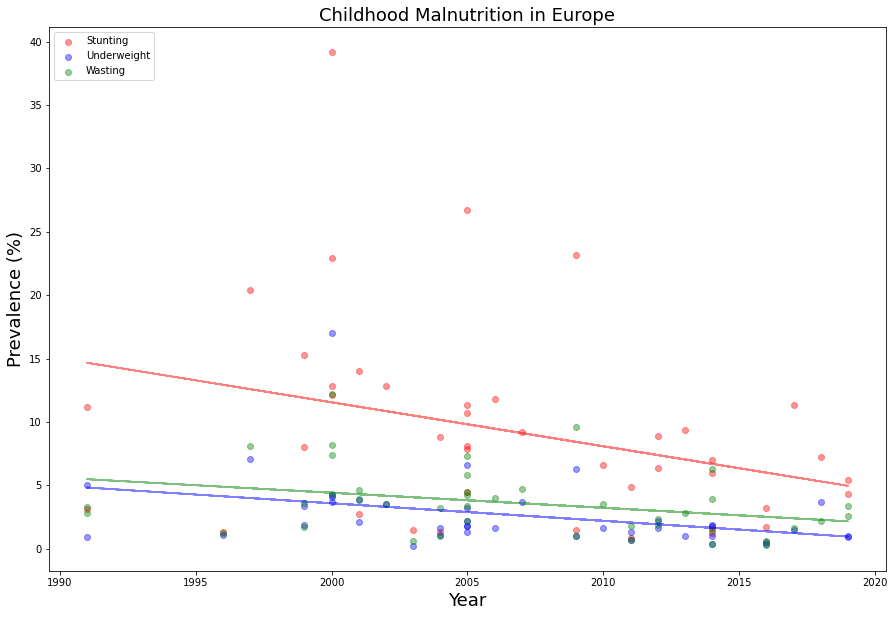

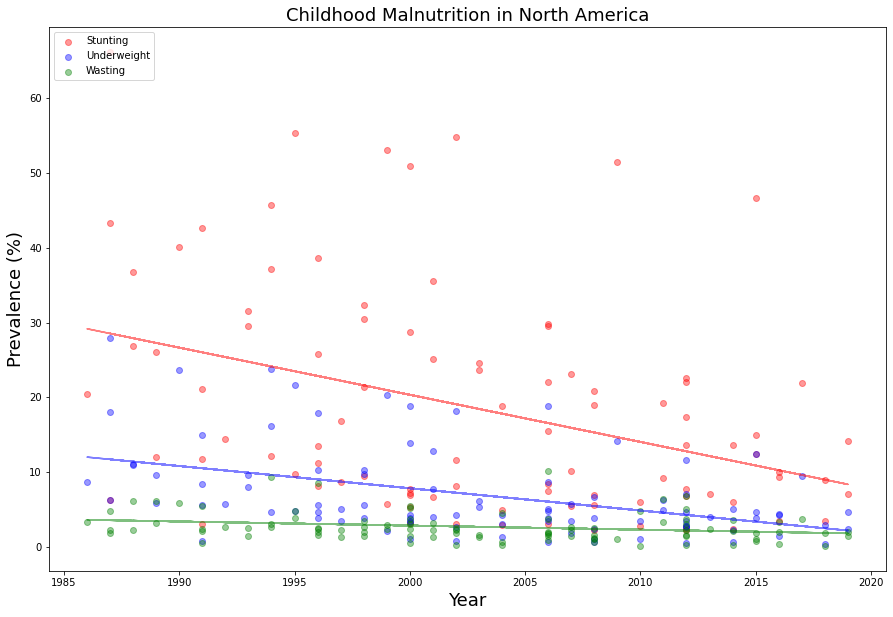

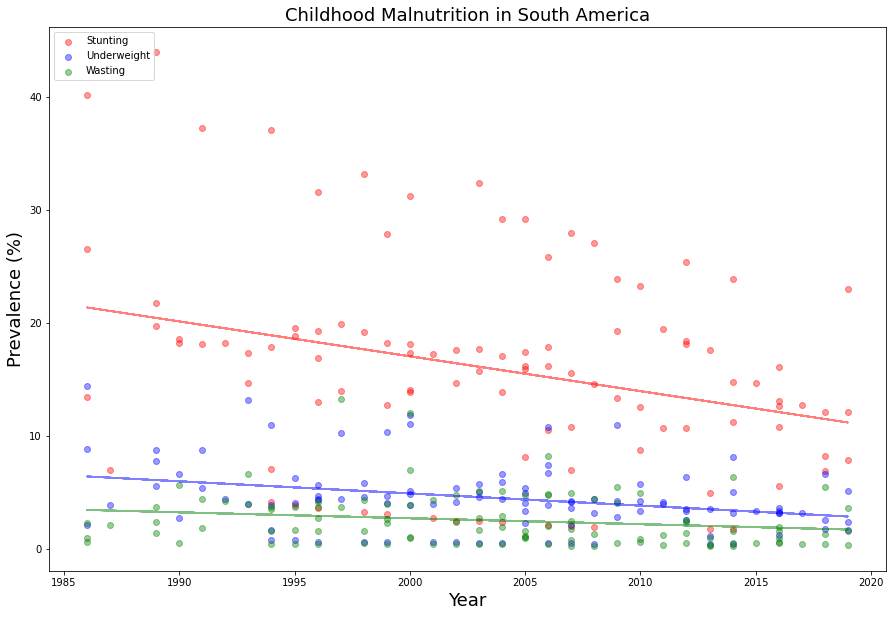

In [16]:
targets = ["Stunting", "Underweight", "Wasting"]

continents = sorted(df['Continent'].unique())
dfs = {}
all_models = {}
# Generating subset dataframes for each continent
for cont in continents:
    dfs[cont] = df.loc[df['Continent'] == cont].copy()
    
# Creating linear regression models for each continent
for cont in continents:
    models = []
    for target in targets:
        X = np.array(dfs[cont]['Year'])
        y = np.array(dfs[cont][target])
        model = stats.linregress(X, y) 
        # Returns slope, intercept, r-value, p-value, stderr
        dfs[cont].loc[:, 'Predicted_' + target] = model[0] * X + model[1]
        models.append(model)
    all_models[cont] = models

# Plotting the results
colors = ['red', 'blue', 'green']
color_map = dict(zip(targets, colors))
for cont in continents:
    fig = plt.figure(figsize=(15, 10))
    for target in targets:
        plt.scatter(dfs[cont]['Year'], dfs[cont][target], c=color_map[target], label=target, alpha=0.4)
        plt.plot(dfs[cont]['Year'], dfs[cont]['Predicted_' + target], c=color_map[target], alpha=0.5)
    plt.xlabel("Year", size=18)
    plt.ylabel("Prevalence (%)", size=18)
    plt.title("Childhood Malnutrition in " + cont, size=18)
    plt.legend(loc='upper left')
    fig.show()

For this project we choose to analyze how our malnutrition metrics (stunting, wasting, underweight) change over time for each continent, by using linear regression for a malnutrition metric vs. year, producing three models per continent. Above, we plot the predictions from the linear models for stunting, wasting, and underweight, for each continent. 

Across all continents, stunting rates are consistently above underweight rates, which are consistently above wasting rates. An exception is Europe, where wasting rates are marginally higher than underweight rates. In most of the graphs, the linear regression lines show that the various malnutrition prevalences are converging in levels, as the more common occurrences (stunting, then underweight) are decreasing faster than wasting.

Generally, the condition of being underweight is a result of stunting, wasting, or a combination of both (https://www.who.int/news-room/fact-sheets/detail/malnutrition). Stunting is generally attributed to chronic undernutrition, whereas wasting is usually indicative of recent and severe weight loss. Because the malnutrition in Europe has higher wasting rates relative to underweight prevalence, we can argue that the malnutrition in Europe is more attributable to wasting than stunting, compared to other continents, or the case could be that this is a result of the noise of the data dominating the actual signal, as there are far fewer data points for Europe than other continents. Similarly, in Australia (Oceania) we observe very few data points.

The fact that underweightness is generally due to a combination of stunting and wasting can also explain the convergence of the linear regression lines. Because stunting rates are decreasing the fastest, wasting rates are decreasing the slowest, and underweight rates are usually decreasing at a rate in between, one could argue that underweightness is caused more by stunting than wasting. A large decrease in stunting corresponds to the same decrease in underweight rates that a small decrease in wasting corresponds to.

It is worth noting that our linear regressions and analysis are limited by our continental grouping of the data. Various countries within the same continent experience childhood malnutrition completely differently. For example, in the graph for South America we can observe a divergent linear pattern of stunting above the trend line, which is likely just the data from an individual country within the continent. By grouping data up by continent, we experience a large variance within continent and possibly violate homoscedasticity assumptions necessary for linear regression, as the variance across time decreases as countries within a continent convergence to lower childhood malnutrition levels. We still believe this is the best choice for our analysis, as the dataset contained too much missing data to analyze individual countries.

In [17]:
p_value_table = []
for cont in continents:
    vals = [model[3] for model in all_models[cont]]
    row = [cont] + vals
    p_value_table.append(row)
cols = ['Continent'] + targets

print("Linear Regression P-Values\n")
print(tabulate(p_value_table, headers=cols))

Linear Regression P-Values

Continent         Stunting    Underweight      Wasting
-------------  -----------  -------------  -----------
Africa         2.81581e-07    0.000817667  0.00043687
Asia           4.14584e-15    2.40751e-11  9.33515e-06
Australia      0.293149       0.251778     0.142537
Europe         0.0372903      0.0201359    0.033773
North America  0.000151146    5.96886e-06  0.0134533
South America  0.00195418     0.00100308   0.045403


To validate our linear regression results, we perform hypothesis testing for each model created. For each continent and malnutrition metric pairing, we can define the following hypotheses:

$$ H_0: \beta=0 $$
$$ H_1: \beta\neq0 $$
where $ \beta $ represents the slope of the line.

Using the Wald Test (https://en.wikipedia.org/wiki/Wald_test) on the t-distribution of the test statistic calculated within Scipy, we perform a two-sided t-test for stunting, underweight, and wasting for each continent; the calculated p-values are in the table above.

With our $\alpha$ level of 0.05, we reject $H_0$ in favor of $H_1$ in every continent for all metrics except Australia, indicating that there is a statistically significant decrease in stunting, underweightness, and wasting over time. As for Australia, we fail to reject $H_0$ for all malnutrition metrics, and thus cannot make any further assessment about how any of the stunting, underweight, or wasting change over time in the continent. The high p-values calculated for Australia can possibly be attributed to the few data points for the continent, as more data consistent with the same linear trend observed from the graph would increase our degrees of freedom relative to the a similar test statistic, which could lead to rejecting $H_0$.

In [19]:
data = {}
p_value_table_anova = []
for target in targets:
    var_data = []
    for cont in continents:
        var_data.append(dfs[cont][target])
    data[target] = var_data
for target in targets:
    F, p = stats.f_oneway(*data[target])
    row = [target] + [p]
    p_value_table_anova.append(row)

In [20]:
print("ANOVA Test P-Values\n")
print(tabulate(p_value_table_anova))

ANOVA Test P-Values

-----------  -----------
Stunting     2.28455e-56
Underweight  2.76413e-56
Wasting      2.32942e-51
-----------  -----------


In addition to examining how malnutrition changes over time within a continent, we also look at how stunting, underweight, and wasting prevalence differ across continents across the entire dataset. We define the following hypotheses:

$$ H_0: \mu_{Africa} = \mu_{Asia} = \mu_{Australia} = \mu_{Europe} = \mu_{North America} = \mu_{South America}$$
$$ H_1: \text{At least one $\mu$ differs from another} $$
where $\mu$ represents the mean stunting, underweight, or wasting prevalence.

Using the one-way ANOVA test on the F-distribution for the F statistics calculated within Scipy, we yield the calculated p-values in the table above.

With our $\alpha$ level of 0.05, we reject $H_0$ in favor of $H_1$ for all malnutrition metrics. This means that there is a statistically significant difference in the prevalence of stunting, underweightness, and wasting, across continents.

## Communication of Insights Attained

In this project, we analyzed three childhood malnutrition metrics: stunting, wasting, and underweightness, and how they vary across time in different continents. We observed how the condition of being underweight is a combination of stunting and wasting, and the linear regression results suggested that stunting is a bigger contributor for most continents. Our visualizations also suggest that within continents, various countries experience childhood malnutrition completely differently. Through hypothesis testing, we established that there is a statistically significant decrease in these various malnutrition prevalences over time in all continents, except Australia which likely needs more data for further analysis. Additionally, we verified an intuitive claim that malnutrition levels are different across continents.

Ultimately, the data suggests that addressing childhood malnutrition is a complicated and nuanced challenge, as every continent and country experiences it differently. Because overall prevalence is significantly different across continents, there is backing for an approach where countries and continents that experience childhood malnutrition less provide aid and support for areas that are affected by it more. Furthermore, our visualizations and regression analysis suggest that stunting is a larger contributor in underweight prevalence, which indicates that policies, aid, and guidelines should primarily focus on reducing stunting.